<a href="https://colab.research.google.com/github/joshual777/PatronesProyecto3/blob/feature%2FHipotesis-1/Leo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import tensorflow as tf

In [1]:
from google.colab import drive
# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Verificar si la GPU está disponible
if tf.test.is_gpu_available():
    # Configurar el dispositivo para utilizar la GPU
    device = tf.device('/GPU:0')
else:
    # Si la GPU no está disponible, utiliza la CPU
    device = tf.device('/CPU:0')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Tamaño de las imágenes: (760, 256, 256, 3)
Tamaño de las etiquetas: (760,)


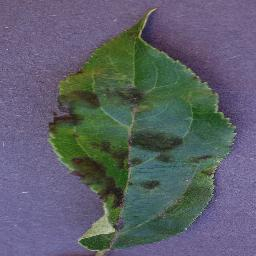

In [4]:
with device:
    # Ruta a la carpeta del conjunto de datos en Google Drive
    data_folders =  ["/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___Apple_scab", 
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___Black_rot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___Cedar_apple_rust",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Blueberry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Cherry___Powdery_mildew",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Cherry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___Cercospora_leaf_spot Gray_leaf_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___Common_rust",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___Northern_Leaf_Blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___Black_rot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___Esca_(Black_Measles)",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Orange___Haunglongbing_(Citrus_greening)",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Peach___Bacterial_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Peach___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Pepper,_bell___Bacterial_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Pepper,_bell___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Potato___Early_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Potato___Late_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Potato___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Raspberry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Soybean___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Squash___Powdery_mildew",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Strawberry___Leaf_scorch",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Strawberry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Bacterial_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Early_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Late_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Leaf_Mold",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Septoria_leaf_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Spider_mites Two-spotted_spider_mite",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Target_Spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Tomato_mosaic_virus",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___healthy"]

    # Definir las etiquetas correspondientes
    labels = {
        "Apple___Apple_scab": 1,
        "Apple___Black_rot": 1,
        "Apple___Cedar_apple_rust": 1,
        "Apple___healthy": 0,
        "Blueberry___healthy": 0,
        "Cherry___Powdery_mildew": 1,
        "Cherry___healthy": 0,
        "Corn___Cercospora_leaf_spot Gray_leaf_spot":1,
        "Corn___Common_rust":1,
        "Corn___Northern_Leaf_Blight":1,
        "Corn___healthy":0,
        "Grape___Black_rot":1,
        "Grape___Esca_(Black_Measles)":1,
        "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)":1,
        "Grape___healthy":0,
        "Orange___Haunglongbing_(Citrus_greening)":1,
        "Peach___Bacterial_spot":1,
        "Peach___healthy":0,
        "Pepper,_bell___Bacterial_spot":1,
        "Pepper,_bell___healthy":0,
        "Potato___Early_blight":1,
        "Potato___Late_blight":1,
        "Potato___healthy":0,
        "Raspberry___healthy":0,
        "Soybean___healthy":0,
        "Squash___Powdery_mildew":1,
        "Strawberry___Leaf_scorch":1,
        "Strawberry___healthy":0,
        "Tomato___Bacterial_spot":1,
        "Tomato___Early_blight":1,
        "Tomato___Late_blight":1,
        "Tomato___Leaf_Mold":1,
        "Tomato___Septoria_leaf_spot":1,
        "Tomato___Spider_mites Two-spotted_spider_mite":1,
        "Tomato___Target_Spot":1,
        "Tomato___Tomato_Yellow_Leaf_Curl_Virus":1,
        "Tomato___Tomato_mosaic_virus":1,
        "Tomato___healthy":0
    }

    # Listas para almacenar las imágenes y las etiquetas
    images = []
    label_list = []

    # Recorrer las carpetas y cargar las imágenes
    for folder in data_folders:
        label = labels.get(os.path.basename(folder), 0)  # Obtener la etiqueta correspondiente
        #print(folder)
        count = 0  # Variable de conteo
        for filename in os.listdir(folder):
            if count >= 20:  # Controlar el número de archivos leídos
              break
            if filename.endswith(".JPG"):
                #print(filename)
                image_path = os.path.join(folder, filename)
                image = cv2.imread(image_path)
                images.append(image)
                label_list.append(label)
            if filename.endswith(".jpg"):
                #print(filename)
                image_path = os.path.join(folder, filename)
                image = cv2.imread(image_path)
                images.append(image)
                label_list.append(label)
            count += 1  # Incrementar el conteo

    # Convertir las listas de imágenes y etiquetas a arreglos numpy
    images = np.array(images)
    labels = np.array(label_list)

    # Imprimir el tamaño de las imágenes y las etiquetas
    print("Tamaño de las imágenes:", images.shape)
    print("Tamaño de las etiquetas:", labels.shape)

    cv2_imshow(images[2])

In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

with device:

    # Dividir los datos etiquetados en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    # Preprocesamiento y normalización de los datos de entrada (imágenes)
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Dividir el conjunto sin etiquetas para entrenar el autoencoder
    X_unlabeled, _, _, _ = train_test_split(images, labels, test_size=1, random_state=42)

    
del images
del labels

(608, 256, 256, 3)
(152, 256, 256, 3)
(608,)
(152,)


#Modelo sin encoder no pesos

In [6]:
with device:
    
    
    # Entrenar el modelo desde cero
    model_from_scratch = keras.Sequential([
        layers.Conv2D(32, kernel_size=3, strides=2, activation='relu', padding='same', input_shape=(256, 256, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])

    model_from_scratch.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model_from_scratch.fit(X_train, y_train, epochs=10, batch_size=64)
    y_pred_prob_from_scratch = model_from_scratch.predict(X_test)

    # Obtener las clases predichas
    y_pred_from_scratch = np.argmax(y_pred_prob_from_scratch, axis=1)

    # Calcular métricas de evaluación
    accuracy_scratch = accuracy_score(y_test, y_pred_from_scratch)
    precision_scratch = precision_score(y_test, y_pred_from_scratch, average='macro')
    f1_scratch = f1_score(y_test, y_pred_from_scratch, average='macro')
    #auc_scratch = roc_auc_score(y_test, model_from_scratch.predict(X_test), average='macro')

    # Imprimir las métricas
    print("Metrics for model trained from scratch:")
    print("Accuracy:", accuracy_scratch)
    print("Precision:", precision_scratch)
    print("F1-Score:", f1_scratch)
    #print("AUC:", auc_scratch)
    print()


    del model_from_scratch
#

Epoch 1/10
48/48 [==============================] - 15s 63ms/step - loss: 0.6152 - accuracy: 0.6687
Epoch 2/10
48/48 [==============================] - 2s 44ms/step - loss: 0.4230 - accuracy: 0.7990
Epoch 3/10
48/48 [==============================] - 2s 40ms/step - loss: 0.3171 - accuracy: 0.8589
Epoch 4/10
48/48 [==============================] - 2s 40ms/step - loss: 0.2661 - accuracy: 0.8855
Epoch 5/10
48/48 [==============================] - 2s 40ms/step - loss: 0.1913 - accuracy: 0.9263
Epoch 6/10
48/48 [==============================] - 2s 40ms/step - loss: 0.1788 - accuracy: 0.9247
Epoch 7/10
48/48 [==============================] - 2s 51ms/step - loss: 0.1289 - accuracy: 0.9536
Epoch 8/10
48/48 [==============================] - 3s 57ms/step - loss: 0.1060 - accuracy: 0.9589
Epoch 9/10
48/48 [==============================] - 2s 41ms/step - loss: 0.0939 - accuracy: 0.9651
Epoch 10/10
24/24 [==============================] - 1s 17ms/step
Metrics for model trained from scratch:
Ac

In [8]:
from tensorflow.keras import layers, models

with device:
        # Definir y entrenar el autoencoder
        autoencoder = models.Sequential([
            layers.Conv2D(8, kernel_size=3, strides=2, activation='relu', padding='same', input_shape=(256, 256, 3)),
            layers.Conv2D(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(3, kernel_size=3, strides=2, activation='sigmoid', padding='same', name='decoded')
            ])

        autoencoder.compile(optimizer='adam', loss='mse')
        autoencoder.fit(X_unlabeled, X_unlabeled, epochs=3, batch_size=8)
        print("Forma convertida:", X_unlabeled.shape)
        print("Forma convertida:", X_unlabeled.shape)
        # Obtener la representación latente de las imágenes con el encoder del autoencoder
        encoder = keras.Model(inputs=autoencoder.input, outputs=autoencoder.layers[2].output)
        X_train_encoded = encoder.predict(X_train)
        X_test_encoded = encoder.predict(X_test)


Epoch 1/3
95/95 [==============================] - 3s 10ms/step - loss: 16435.0586
Epoch 2/3
95/95 [==============================] - 1s 8ms/step - loss: 16396.9375
Epoch 3/3
95/95 [==============================] - 1s 8ms/step - loss: 16396.6777
Forma convertida: (759, 256, 256, 3)
Forma convertida: (759, 256, 256, 3)
5/5 [==============================] - 0s 11ms/step


In [ ]:
with device:
    # Entrenar el modelo utilizando el encoder como base (pesos congelados)
    model_encoder_frozen = keras.Sequential([
        encoder,
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])
    print("Forma original:", X_train.shape)
    #y_train = np.argmax(y_train, axis=1)
    print("Forma original:", y_train.shape)
    model_encoder_frozen.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model_encoder_frozen.fit(X_train, y_train, epochs=3, batch_size=16)
    y_pred_encoder_frozen = model_encoder_frozen.predict_classes(X_test)

    # Calcular métricas de evaluación
    accuracy_frozen = accuracy_score(y_test, y_pred_encoder_frozen)
    precision_frozen = precision_score(y_test, y_pred_encoder_frozen, average='macro')
    f1_frozen = f1_score(y_test, y_pred_encoder_frozen, average='macro')

    print("Metrics for model with frozen encoder:")
    print("Accuracy:", accuracy_frozen)
    print("Precision:", precision_frozen)
    print("F1-Score:", f1_frozen)
    print()

    del model_encoder_frozen

In [ ]:
# Entrenar el modelo utilizando el encoder como base (pesos modificables)
    model_encoder_trainable = keras.Sequential([
        encoder,
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])

    model_encoder_trainable.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model_encoder_trainable.fit(X_train, y_train, epochs=10, batch_size=8)

    # Evaluar los modelos en el conjunto de prueba


    y_pred_encoder_trainable = model_encoder_trainable.predict_classes(X_test)

    # Calcular métricas de evaluación
    accuracy_trainable = accuracy_score(y_test, y_pred_encoder_trainable)
    precision_trainable = precision_score(y_test, y_pred_encoder_trainable, average='macro')
    f1_trainable = f1_score(y_test, y_pred_encoder_trainable, average='macro')
    #auc_trainable = roc_auc_score(y_test, model_encoder_trainable.predict(X_test), average='macro')

    print("Metrics for model with trainable encoder:")
    print("Accuracy:", accuracy_trainable)
    print("Precision:", precision_trainable)
    print("F1-Score:", f1_trainable)
    #print("AUC:", auc_trainable)

    del model_encoder_trainable

Test

#Asignacion de datos a binario

In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Ruta a la carpeta del conjunto de datos en Google Drive
data_folders =  ["/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___Apple_scab", 
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___Black_rot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___Cedar_apple_rust",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Blueberry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Cherry___Powdery_mildew",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Cherry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___Cercospora_leaf_spot Gray_leaf_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___Common_rust",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___Northern_Leaf_Blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___Black_rot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___Esca_(Black_Measles)",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Orange___Haunglongbing_(Citrus_greening)",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Peach___Bacterial_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Peach___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Pepper,_bell___Bacterial_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Pepper,_bell___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Potato___Early_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Potato___Late_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Potato___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Raspberry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Soybean___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Squash___Powdery_mildew",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Strawberry___Leaf_scorch",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Strawberry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Bacterial_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Early_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Late_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Leaf_Mold",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Septoria_leaf_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Spider_mites Two-spotted_spider_mite",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Target_Spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Tomato_mosaic_virus",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___healthy"]

    # Definir las etiquetas correspondientes
labels = {
        "Apple___Apple_scab": 1,
        "Apple___Black_rot": 1,
        "Apple___Cedar_apple_rust": 1,
        "Apple___healthy": 0,
        "Blueberry___healthy": 0,
        "Cherry___Powdery_mildew": 1,
        "Cherry___healthy": 0,
        "Corn___Cercospora_leaf_spot Gray_leaf_spot":1,
        "Corn___Common_rust":1,
        "Corn___Northern_Leaf_Blight":1,
        "Corn___healthy":0,
        "Grape___Black_rot":1,
        "Grape___Esca_(Black_Measles)":1,
        "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)":1,
        "Grape___healthy":0,
        "Orange___Haunglongbing_(Citrus_greening)":1,
        "Peach___Bacterial_spot":1,
        "Peach___healthy":0,
        "Pepper,_bell___Bacterial_spot":1,
        "Pepper,_bell___healthy":0,
        "Potato___Early_blight":1,
        "Potato___Late_blight":1,
        "Potato___healthy":0,
        "Raspberry___healthy":0,
        "Soybean___healthy":0,
        "Squash___Powdery_mildew":1,
        "Strawberry___Leaf_scorch":1,
        "Strawberry___healthy":0,
        "Tomato___Bacterial_spot":1,
        "Tomato___Early_blight":1,
        "Tomato___Late_blight":1,
        "Tomato___Leaf_Mold":1,
        "Tomato___Septoria_leaf_spot":1,
        "Tomato___Spider_mites Two-spotted_spider_mite":1,
        "Tomato___Target_Spot":1,
        "Tomato___Tomato_Yellow_Leaf_Curl_Virus":1,
        "Tomato___Tomato_mosaic_virus":1,
        "Tomato___healthy":0
    }


# Listas para almacenar las imágenes y las etiquetas
images = []
label_list = []

# Recorrer las carpetas y cargar las imágenes
for folder in data_folders:
    label = labels.get(os.path.basename(folder), 0)  # Obtener la etiqueta correspondiente
    count = 0  # Variable de conteo
    for filename in os.listdir(folder):
        if count >= 20:  # Controlar el número de archivos leídos
            break
        if filename.lower().endswith((".jpg", ".JPG")):
            image_path = os.path.join(folder, filename)
            image = cv2.imread(image_path)
            images.append(image)
            label_list.append(label)
            count += 1

# Convertir las listas de imágenes y etiquetas a arreglos numpy
images = np.array(images)
labels = np.array(label_list)

# Preprocesamiento y normalización de los datos de entrada (imágenes)
images = images.astype('float32') / 255.0

# Dividir los datos etiquetados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)



#Modelo con encoder con pesos congelados 

In [5]:
# Crear el modelo del autoencoder
input_shape = X_train[0].shape

encoder_input = keras.Input(shape=input_shape)
encoder_output = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoder_input)
encoder_output = layers.MaxPooling2D((2, 2), padding='same')(encoder_output)
encoder_output = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_output)
encoder_output = layers.MaxPooling2D((2, 2), padding='same')(encoder_output)

decoder_output = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_output)
decoder_output = layers.UpSampling2D((2, 2))(decoder_output)
decoder_output = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(decoder_output)
decoder_output = layers.UpSampling2D((2, 2))(decoder_output)
decoder_output = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoder_output)

autoencoder = keras.Model(encoder_input, decoder_output)
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenar el autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=16)

# Obtener la salida del encoder (características latentes)
encoder = keras.Model(encoder_input, encoder_output)
encoder.trainable = False
encoder_output = encoder(encoder_input)

# Crear el modelo basado en el autoencoder
classifier = layers.Flatten()(encoder_output)
classifier = layers.Dense(64, activation='relu')(classifier)
classifier = layers.Dense(1, activation='sigmoid')(classifier)

model = keras.Model(encoder_input, classifier)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo basado en el autoencoder
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Evaluar el modelo
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
#print("ROC AUC Score:", roc_auc)

Epoch 1/10
38/38 [==============================] - 4s 41ms/step - loss: 0.0317
Epoch 2/10
38/38 [==============================] - 1s 39ms/step - loss: 0.0127
Epoch 3/10
38/38 [==============================] - 1s 34ms/step - loss: 0.0079
Epoch 4/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0064
Epoch 5/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0060
Epoch 6/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0058
Epoch 7/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0056
Epoch 8/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0055
Epoch 9/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0053
Epoch 10/10
38/38 [==============================] - 1s 37ms/step - loss: 0.0050
Epoch 1/10
38/38 [==============================] - 2s 13ms/step - loss: 1.4569 - accuracy: 0.6628
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 0.5354 - accuracy: 0.7533
E

#Modelo con encoder sin pesos congelados

In [6]:

# Crear el modelo del autoencoder
input_shape = X_train[0].shape

encoder_input = keras.Input(shape=input_shape)
encoder_output = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoder_input)
encoder_output = layers.MaxPooling2D((2, 2), padding='same')(encoder_output)
encoder_output = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_output)
encoder_output = layers.MaxPooling2D((2, 2), padding='same')(encoder_output)

decoder_output = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_output)
decoder_output = layers.UpSampling2D((2, 2))(decoder_output)
decoder_output = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(decoder_output)
decoder_output = layers.UpSampling2D((2, 2))(decoder_output)
decoder_output = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoder_output)

autoencoder = keras.Model(encoder_input, decoder_output)
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenar el autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=16)

# Obtener la salida del encoder (características latentes)
encoder = keras.Model(encoder_input, encoder_output)

# Crear el modelo basado en el autoencoder
classifier = layers.Flatten()(encoder_output)
classifier = layers.Dense(64, activation='relu')(classifier)
classifier = layers.Dense(1, activation='sigmoid')(classifier)

model = keras.Model(encoder_input, classifier)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo basado en el autoencoder
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Evaluar el modelo
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
#print("ROC AUC Score:", roc_auc)

#En este código, se ha eliminado la línea encoder.trainable = False 
#para que los pesos del encoder no estén congelados y se actualicen 
#durante el entrenamiento del clasificador.

Epoch 1/10
38/38 [==============================] - 4s 38ms/step - loss: 0.0344
Epoch 2/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0140
Epoch 3/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0088
Epoch 4/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0073
Epoch 5/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0066
Epoch 6/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0062
Epoch 7/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0058
Epoch 8/10
38/38 [==============================] - 1s 37ms/step - loss: 0.0056
Epoch 9/10
38/38 [==============================] - 1s 38ms/step - loss: 0.0055
Epoch 10/10
38/38 [==============================] - 1s 38ms/step - loss: 0.0054
Epoch 1/10
38/38 [==============================] - 2s 17ms/step - loss: 1.3680 - accuracy: 0.6562
Epoch 2/10
38/38 [==============================] - 1s 15ms/step - loss: 0.4802 - accuracy: 0.7549
E